In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "proportional/toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.05,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,1.000000,0.714286,1.000000,0.833333,0.833333,0.857143
1,1.000000,0.833333,0.666667,1.000000,0.833333,0.666667,0.833333
2,0.833333,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
3,1.000000,0.666667,0.833333,0.666667,1.000000,0.833333,0.666667
4,0.800000,1.000000,1.000000,1.000000,0.800000,0.600000,1.000000
...,...,...,...,...,...,...,...
45,1.000000,1.000000,0.833333,0.833333,1.000000,0.833333,0.833333
46,0.666667,0.833333,0.666667,0.833333,0.833333,1.000000,1.000000
47,0.833333,0.800000,0.666667,0.833333,0.833333,0.833333,0.833333
48,1.000000,0.857143,1.000000,1.000000,1.000000,0.833333,0.833333


In [5]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.05,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,12.945555,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
1,20.480857,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
2,12.859646,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
3,12.363292,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
4,12.142450,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
...,...,...,...,...,...,...,...
45,11.889540,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
46,13.714404,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
47,12.630095,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588
48,13.646252,30.150665,21.821449,16.116208,13.696143,12.308957,11.39588


In [6]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [7]:
MSE_df.mean()

1.0        4.716243
UV_0.05    4.708180
UV_0.1     4.749696
UV_0.2     4.781102
UV_0.3     4.861120
UV_0.4     4.880631
UV_0.5     4.968677
dtype: float64

In [8]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False# if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
        axes[i].set_title(f'{metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/1788569641.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/1788569641.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/1788569641.py:14: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, showmeans=showmeans)


Coverage :
 RRT(1)      0.899895
UV(0.05)    0.900295
UV(0.1)     0.900790
UV(0.2)     0.894914
UV(0.3)     0.894610
UV(0.4)     0.905886
UV(0.5)     0.904429
dtype: float64
Length :
 RRT(1)      13.283025
UV(0.05)    30.150665
UV(0.1)     21.821449
UV(0.2)     16.116208
UV(0.3)     13.696143
UV(0.4)     12.308957
UV(0.5)     11.395880
dtype: float64
MSE :
 RRT(1)      4.716243
UV(0.05)    4.708180
UV(0.1)     4.749696
UV(0.2)     4.781102
UV(0.3)     4.861120
UV(0.4)     4.880631
UV(0.5)     4.968677
dtype: float64


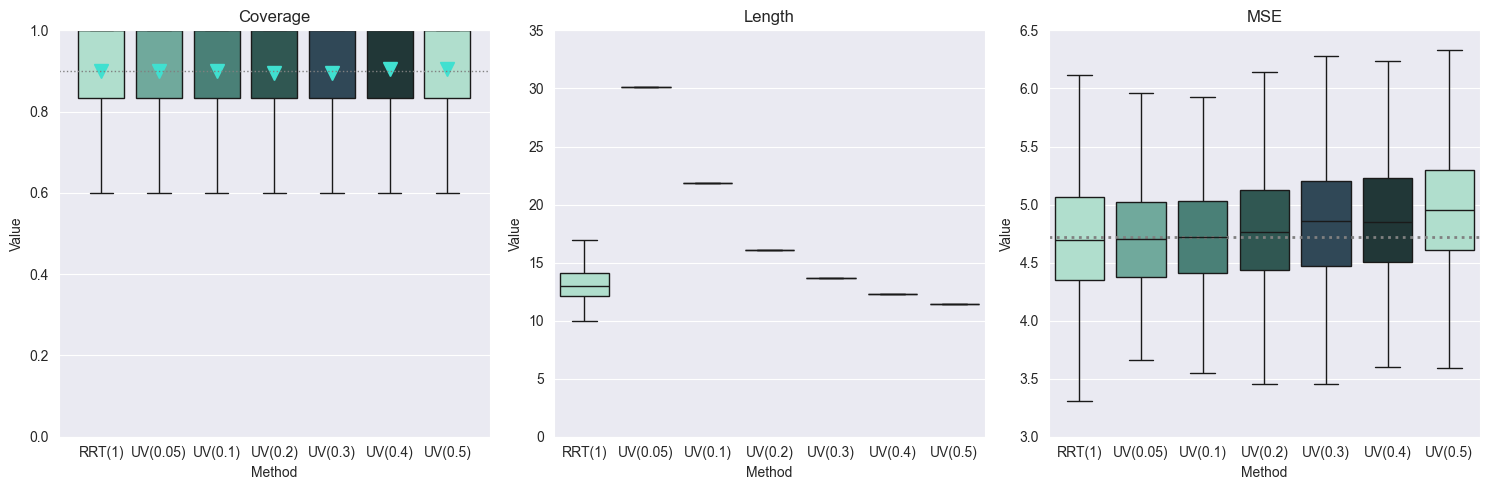

In [9]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=35,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.05)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def boxplots_ratio(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key="RRT(1)", MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names

        showmeans = False  # if metric == "Coverage" else True

        # Default plotting frame
        plot_df = df.copy()
        x_labels = list(plot_df.columns)
        y_label = 'Value'

        if metric == "Length":
            # ---- Ratio plot: UV(p) / RRT(1) for p in [0.05, 0.50] ----
            if len_baseline_key not in plot_df.columns:
                raise ValueError(f'Baseline column "{len_baseline_key}" not found. Available: {list(plot_df.columns)}')

            # Find UV(p) columns and keep those within [0.05, 0.50]
            uv_cols = []
            for c in plot_df.columns:
                m = re.fullmatch(r"UV\((0?\.\d+)\)", c)
                if m:
                    p = float(m.group(1))
                    if 0.05 <= p <= 0.50:
                        uv_cols.append((p, c))
            # Sort by p and keep the columns in order
            uv_cols.sort(key=lambda t: t[0])
            uv_cols = [c for _, c in uv_cols]
            if not uv_cols:
                raise ValueError("No UV(p) columns in the range [0.05, 0.50] were found (e.g., 'UV(0.05)', 'UV(0.10)', ..., 'UV(0.50)').")
            # Compute ratios: RRT(1) / UV(p)
            baseline = plot_df[len_baseline_key]
            ratio_dict = {c: baseline / plot_df[c] for c in uv_cols}
            plot_df = pd.DataFrame(ratio_dict)

            x_labels = uv_cols
            y_label =  r'UV($\gamma$)' + f' / {len_baseline_key}'

        # Draw the boxplot
        sns.boxplot(data=plot_df[x_labels], ax=axes[i], palette=palette if metric != 'Length' else palette[1:], showfliers=False, showmeans=showmeans)
        if metric != "Length":
            axes[i].set_title(f'{metric}')
        else:
            axes[i].set_title("Ratio of Length Relative to RRT(1)")
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel(y_label)
        axes[i].set_xticklabels(x_labels)

        # Add triangles for the mean values (Coverage only)
        means = plot_df[x_labels].mean()
        print(metric, ":\n", means.T)
        if metric == "Coverage":
            for j, mean in enumerate(means):
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)

        # Y-lims and reference lines
        if metric == "Coverage":
            axes[i].set_ylim(0, 1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0, len_lim)  # interpret len_lim as ratio limit here
            axes[i].axhline(y=1, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "MSE":
            axes[i].set_ylim(3, 6.5 if MSE_lim is None else MSE_lim)
            if MSE_baseline_key:
                orig_means = df.mean()  # baseline line on original MSE scale
                axes[i].axhline(y=orig_means[MSE_baseline_key], linestyle='dotted', color='grey', linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()


/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/2337591272.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/2337591272.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_70196/2337591272.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_labels)


Coverage :
 RRT(1)      0.899895
UV(0.05)    0.900295
UV(0.1)     0.900790
UV(0.2)     0.894914
UV(0.3)     0.894610
UV(0.4)     0.905886
UV(0.5)     0.904429
dtype: float64
Length :
 UV(0.05)    0.440555
UV(0.1)     0.608714
UV(0.2)     0.824203
UV(0.3)     0.969837
UV(0.4)     1.079135
UV(0.5)     1.165599
dtype: float64
MSE :
 RRT(1)      4.716243
UV(0.05)    4.708180
UV(0.1)     4.749696
UV(0.2)     4.781102
UV(0.3)     4.861120
UV(0.4)     4.880631
UV(0.5)     4.968677
dtype: float64


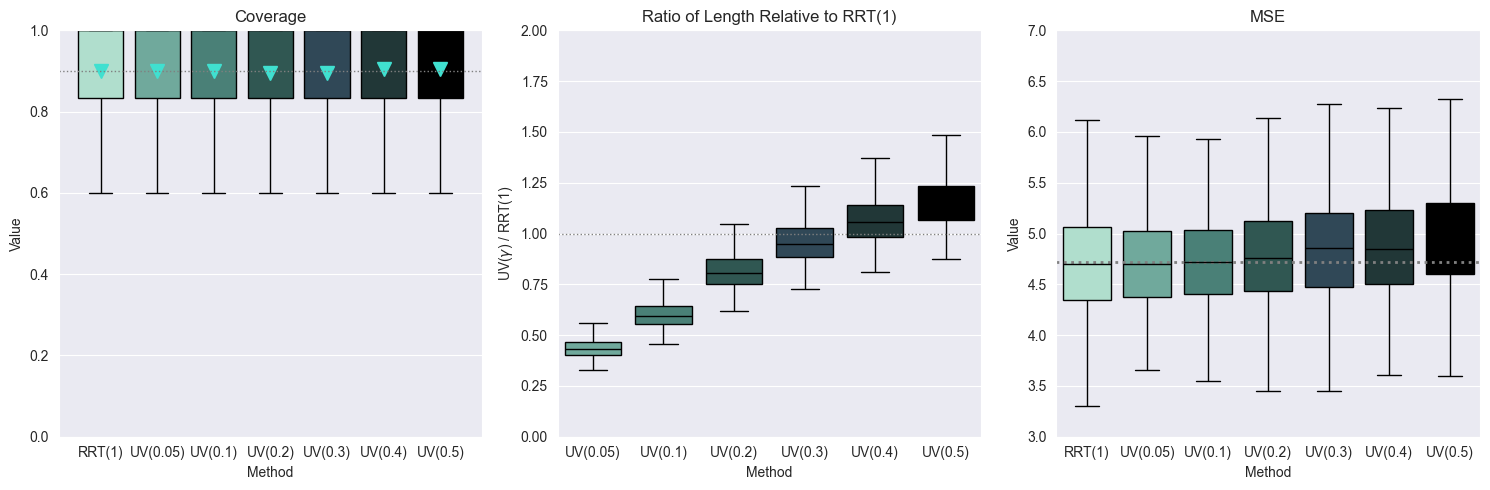

In [35]:
boxplots_ratio(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=2,
               MSE_lim=7,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.05)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A", '#000000'])